In [246]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [247]:
pitches = pd.read_csv('pitches.csv')
print(pitches.shape)
pitches.head()

(768789, 39)


,ab_id,ax,ay,az,b_count,b_score,break_angle,break_length,break_y,code,...,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,zone
0,2015000001,7.665,34.685,-11.960,0,0,-25.0,3.2,23.7,C,...,2.0,-6.409,-136.065,-3.995,101.140000,2.280,158.780000,50.0,5.302,3.0
1,2015000001,12.043,34.225,-10.085,0,0,-40.7,3.4,23.7,S,...,2.0,-8.411,-135.690,-5.980,124.280000,2.119,175.410000,50.0,5.307,5.0
2,2015000001,14.368,35.276,-11.560,0,0,-43.7,3.7,23.7,F,...,2.0,-9.802,-137.668,-3.337,136.740000,2.127,150.110000,50.0,5.313,1.0
3,2015000001,2.104,28.354,-20.540,0,0,-1.3,5.0,23.8,B,...,2.0,-8.071,-133.005,-6.567,109.685636,2.279,187.463482,50.0,5.210,13.0
4,2015000001,-10.280,21.774,-34.111,1,0,18.4,12.0,23.8,B,...,2.0,-6.309,-110.409,0.325,146.527525,2.179,177.242829,50.0,5.557,13.0


In [248]:
atbats = pd.read_csv('atbats.csv')
print(atbats.shape)
atbats.head()

(740389, 11)


,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


In [249]:
df = pitches.merge(atbats, on='ab_id')
df.head()

,ab_id,ax,ay,az,b_count,b_score,break_angle,break_length,break_y,code,...,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,7.665,34.685,-11.960,0,0,-25.0,3.2,23.7,C,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000001,12.043,34.225,-10.085,0,0,-40.7,3.4,23.7,S,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
2,2015000001,14.368,35.276,-11.560,0,0,-43.7,3.7,23.7,F,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
3,2015000001,2.104,28.354,-20.540,0,0,-1.3,5.0,23.8,B,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
4,2015000001,-10.280,21.774,-34.111,1,0,18.4,12.0,23.8,B,...,572761,Groundout,201500001,1,1,0,L,452657,L,True


In [250]:
del df['ax'], df['ay'], df['az'], df['b_score'], df['break_angle'], df['break_length'], df['break_y'], 
del df['end_speed'], df['nasty'], df['pfx_x'], df['pfx_z'], df['px'], df['pz'], df['spin_dir'], df['spin_rate'], 
del df['start_speed'], df['sz_bot'], df['sz_top'], df['type_confidence'], df['vx0'], df['vy0'],
del df['vz0'], df['x'], df['x0'], df['y'], df['y0'], df['z0'], df['zone']
del df['inning'], df['p_score'], df['p_throws'], df['top']
del df['batter_id'], df['event'], df['g_id'], df['o'], df['type'], df['code']

In [251]:
astros_pitchers = df.loc[(df['pitcher_id'] == 434378) | (df['pitcher_id'] == 572971) | 
                (df['pitcher_id'] == 621121) | (df['pitcher_id'] == 543037) | 
                (df['pitcher_id'] == 450203)]
print(astros_pitchers.shape)

(14249, 11)


In [252]:
dif_pitches = astros_pitchers.pitch_type.unique()
print(dif_pitches)

['FF' 'FC' 'FT' 'SL' 'CH' 'SI' 'KC' 'CU' 'IN' nan 'FS' 'PO']


In [253]:
astros = df.loc[(df['pitcher_id'] == 434378) | (df['pitcher_id'] == 572971) | 
                (df['pitcher_id'] == 621121) | (df['pitcher_id'] == 543037) | 
                (df['pitcher_id'] == 450203)]
print(astros_pitchers.shape)

(14249, 11)


In [254]:
astros.head()

,ab_id,b_count,on_1b,on_2b,on_3b,outs,pitch_num,pitch_type,s_count,pitcher_id,stand
1664,2015000429,0,False,False,False,0,1,FF,0,572971,L
1665,2015000429,0,False,False,False,0,2,FF,1,572971,L
1666,2015000430,0,False,False,False,1,1,FF,0,572971,L
1667,2015000430,0,False,False,False,1,2,FC,1,572971,L
1668,2015000430,1,False,False,False,1,3,FT,1,572971,L


In [255]:
pitch_counts = astros.pitch_type.value_counts()
pitch_counts

FF    4933
FT    3309
SL    1936
CH    1087
KC    1022
CU     932
SI     544
FC     254
FS     180
IN      34
PO       4
Name: pitch_type, dtype: int64

In [256]:
astros = astros[[ 'ab_id','pitch_num', 's_count', 'b_count','on_1b', 'on_2b', 'on_3b', 'outs','pitch_type', 'stand', 'pitcher_id']]
astros.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
1664,2015000429,1,0,0,False,False,False,0,FF,L,572971
1665,2015000429,2,1,0,False,False,False,0,FF,L,572971
1666,2015000430,1,0,0,False,False,False,1,FF,L,572971
1667,2015000430,2,1,0,False,False,False,1,FC,L,572971
1668,2015000430,3,1,1,False,False,False,1,FT,L,572971


In [257]:
astros = astros[astros.pitch_type != 'FC']
astros = astros[astros.pitch_type != 'FS']
astros = astros[astros.pitch_type != 'IN']
astros = astros[astros.pitch_type != 'PO']

In [258]:
dif_pitches = astros.pitch_type.unique()
print(dif_pitches)

['FF' 'FT' 'SL' 'CH' 'SI' 'KC' 'CU' nan]


In [259]:
astros.isnull().sum()

ab_id          0
pitch_num      0
s_count        0
b_count        0
on_1b          0
on_2b          0
on_3b          0
outs           0
pitch_type    14
stand          0
pitcher_id     0
dtype: int64

In [260]:
astros = astros.dropna()

In [261]:
dif_pitches = astros.pitch_type.unique()
print(dif_pitches)

['FF' 'FT' 'SL' 'CH' 'SI' 'KC' 'CU']


Below we save the cleaned data frame before making further changes so we can import that new dataset for new prediction tests. 

In [262]:
pitchers_astros = astros

In [263]:
pitchers_astros.to_csv('pitchers_astros.csv')

In [264]:
pitchers_astros = pd.read_csv('pitchers_astros.csv')

Here we make a dictionary for the different type of pitches. We do this to change the pitch types from a string to an integer so we can easily make comparisons and run tests.

In [265]:
# dictionary 
pitch_type_dict = {"FF":0, "FT": 1, "SL": 2, "CH": 3, "SI":4, "KC": 5, "CU": 6}
print(pitch_type_dict)

{'FF': 0, 'FT': 1, 'SL': 2, 'CH': 3, 'SI': 4, 'KC': 5, 'CU': 6}


In [266]:
astros['pitch_type'] = astros.pitch_type.map(pitch_type_dict)

In [267]:
#check to make sure the dictionary was added the the table properly
astros.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
1664,2015000429,1,0,0,False,False,False,0,0,L,572971
1665,2015000429,2,1,0,False,False,False,0,0,L,572971
1666,2015000430,1,0,0,False,False,False,1,0,L,572971
1668,2015000430,3,1,1,False,False,False,1,1,L,572971
1669,2015000430,4,1,2,False,False,False,1,2,L,572971


Here we drop the pitch type column because it is the target. This way wee can make future comparisons and preditions to see if there is a pattern for different pitch types

In [268]:
target = astros['pitch_type']
astros.drop('pitch_type', axis=1, inplace=True)

In [269]:
astros.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,stand,pitcher_id
1664,2015000429,1,0,0,False,False,False,0,L,572971
1665,2015000429,2,1,0,False,False,False,0,L,572971
1666,2015000430,1,0,0,False,False,False,1,L,572971
1668,2015000430,3,1,1,False,False,False,1,L,572971
1669,2015000430,4,1,2,False,False,False,1,L,572971


In [270]:
astros.dtypes

ab_id          int64
pitch_num      int64
s_count        int64
b_count        int64
on_1b           bool
on_2b           bool
on_3b           bool
outs           int64
stand         object
pitcher_id     int64
dtype: object

We need to check the dtypes for our values. The true/false statements are being read as booleans so we do not need to make any changes. The stand values (L and R) are being interpretted as an object so we must convert them into integers. We will do this by converting L's to 0 and R's to 1.

In [271]:
astros.stand[astros.stand == 'L'] = 0
astros.stand[astros.stand == 'R'] = 1

In [272]:
astros.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,stand,pitcher_id
1664,2015000429,1,0,0,False,False,False,0,0,572971
1665,2015000429,2,1,0,False,False,False,0,0,572971
1666,2015000430,1,0,0,False,False,False,1,0,572971
1668,2015000430,3,1,1,False,False,False,1,0,572971
1669,2015000430,4,1,2,False,False,False,1,0,572971


In [273]:
data = pd.get_dummies(astros)
data.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,stand_0,stand_1
1664,2015000429,1,0,0,False,False,False,0,572971,1,0
1665,2015000429,2,1,0,False,False,False,0,572971,1,0
1666,2015000430,1,0,0,False,False,False,1,572971,1,0
1668,2015000430,3,1,1,False,False,False,1,572971,1,0
1669,2015000430,4,1,2,False,False,False,1,572971,1,0


Here we created dummie values to run our tests. The dummie values created two seperate columns for stand, a left and a right. To make comparisons we will need to drop one column. We will drop the stand_1 column and rename the stand_0 column to bats left. We change the column to bats because the values in stand_0 represent 1 as left(true) and 0 as right(false).

In [274]:
data = data.drop(['stand_1'], axis=1)

In [275]:
data = data.rename(index=str, columns={"stand_0": "bats_left"})

In [276]:
data.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,bats_left
1664,2015000429,1,0,0,False,False,False,0,572971,1
1665,2015000429,2,1,0,False,False,False,0,572971,1
1666,2015000430,1,0,0,False,False,False,1,572971,1
1668,2015000430,3,1,1,False,False,False,1,572971,1
1669,2015000430,4,1,2,False,False,False,1,572971,1


In [277]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size =.25, random_state=123)

In [278]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [279]:
#check importances of the features
tree_clf.feature_importances_

array([0.04347353, 0.0147892 , 0.07450128, 0.00950294, 0.        ,
       0.00611861, 0.00140844, 0.        , 0.83439073, 0.01581527])

## Results

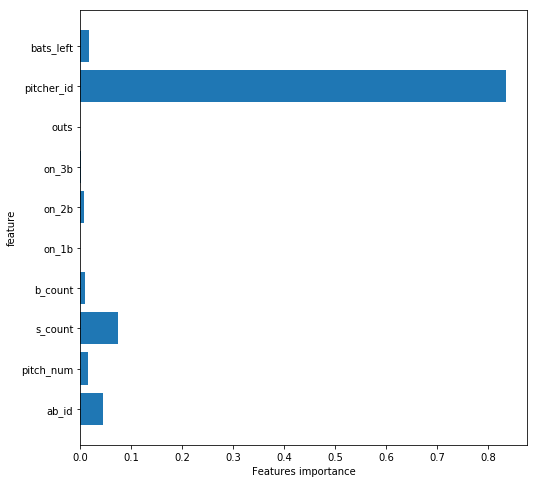

In [280]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

From the graph above, we can see that pitcher id has the most impact on the type of pitch thrown. This shows that who the pitcher is is the biggest contributing factor. This is true because it pitcher has a pitch or two they're best at and tend to try to stick to them.  

In [284]:
pred = tree_clf.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[1012  136   13    0    0   96    0]
 [   5  758   37    0    0    4    0]
 [ 280  154   56    0    0    0    0]
 [ 101  108   19    0    0   44    0]
 [ 138    0    0    0    0    0    0]
 [ 126    0    0    0    0  116    0]
 [ 101  137    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.57      0.81      0.67      1257
           1       0.59      0.94      0.72       804
           2       0.45      0.11      0.18       490
           3       0.00      0.00      0.00       272
           4       0.00      0.00      0.00       138
           5       0.45      0.48      0.46       242
           6       0.00      0.00      0.00       238

   micro avg       0.56      0.56      0.56      3441
   macro avg       0.29      0.33      0.29      3441
weighted avg       0.44      0.56      0.47      3441



In [286]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [287]:
bagged_tree.score(data_train, target_train)

0.5742104243363689

As we can see, 57% is not a great accuracy but it is better than random quessing. We can also see from our matrix that we can accurately predict a fastball about 58% of the time and a breaking ball about 45% of the time. We will further look into cateorgies of pitches and see how predictble they are.

# Fastball: four seam, two seam, sinker

Here we will be running our test to see if we can predict wether or not a fastball will be thrown. We are categorizing fastballs as four seam & two seam fastballs and sinkers.

In [80]:
fastball = pd.read_csv('pitchers_astros.csv')

In [81]:
fastball.head()

,Unnamed: 0,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
0,1664,2015000429,1,0,0,False,False,False,0,FF,L,572971
1,1665,2015000429,2,1,0,False,False,False,0,FF,L,572971
2,1666,2015000430,1,0,0,False,False,False,1,FF,L,572971
3,1668,2015000430,3,1,1,False,False,False,1,FT,L,572971
4,1669,2015000430,4,1,2,False,False,False,1,SL,L,572971


In the dictionary here we will classify four seam, two seam, and sinkers as fastball (1) and everything else as not a fastball (0).

In [82]:
dif_pitches = fastball.pitch_type.unique()
print(dif_pitches)

['FF' 'FT' 'SL' 'CH' 'SI' 'KC' 'CU']


In [83]:
pitch_type_fb = {"FF":1, "FT": 1, "SL": 0, "CH": 0, "SI":1, "KC": 0, "CU": 0}
print(pitch_type_fb)

{'FF': 1, 'FT': 1, 'SL': 0, 'CH': 0, 'SI': 1, 'KC': 0, 'CU': 0}


In [84]:
fastball['pitch_type'] = fastball.pitch_type.map(pitch_type_fb)

In [85]:
fastball.head()

,Unnamed: 0,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
0,1664,2015000429,1,0,0,False,False,False,0,1,L,572971
1,1665,2015000429,2,1,0,False,False,False,0,1,L,572971
2,1666,2015000430,1,0,0,False,False,False,1,1,L,572971
3,1668,2015000430,3,1,1,False,False,False,1,1,L,572971
4,1669,2015000430,4,1,2,False,False,False,1,0,L,572971


In [86]:
target_fb = fastball['pitch_type']
fastball.drop('pitch_type', axis=1, inplace=True)
fastball.drop('Unnamed: 0', axis=1, inplace=True)

In [87]:
fastball.stand[fastball.stand == 'L'] = 0
fastball.stand[fastball.stand == 'R'] = 1

In [88]:
fastball.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,stand,pitcher_id
0,2015000429,1,0,0,False,False,False,0,0,572971
1,2015000429,2,1,0,False,False,False,0,0,572971
2,2015000430,1,0,0,False,False,False,1,0,572971
3,2015000430,3,1,1,False,False,False,1,0,572971
4,2015000430,4,1,2,False,False,False,1,0,572971


In [89]:
data_fb = pd.get_dummies(fastball)
data_fb.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,stand_0,stand_1
0,2015000429,1,0,0,False,False,False,0,572971,1,0
1,2015000429,2,1,0,False,False,False,0,572971,1,0
2,2015000430,1,0,0,False,False,False,1,572971,1,0
3,2015000430,3,1,1,False,False,False,1,572971,1,0
4,2015000430,4,1,2,False,False,False,1,572971,1,0


In [90]:
data_fb = data_fb.drop(['stand_1'], axis=1)

In [91]:
data_fb = data_fb.rename(index=str, columns={"stand_0": "bats_left"})

In [92]:
data_fb.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,bats_left
0,2015000429,1,0,0,False,False,False,0,572971,1
1,2015000429,2,1,0,False,False,False,0,572971,1
2,2015000430,1,0,0,False,False,False,1,572971,1
3,2015000430,3,1,1,False,False,False,1,572971,1
4,2015000430,4,1,2,False,False,False,1,572971,1


In [95]:
data_fb_train, data_fb_test, target_fb_train, target_fb_test = train_test_split(
    data_fb, target_fb, test_size =.25, random_state=123)

In [96]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(data_fb_train, target_fb_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
#check importances of the features
tree_clf.feature_importances_

array([0.03461026, 0.09878944, 0.42066008, 0.14959874, 0.        ,
       0.05545346, 0.01968811, 0.        , 0.22119991, 0.        ])

## Results

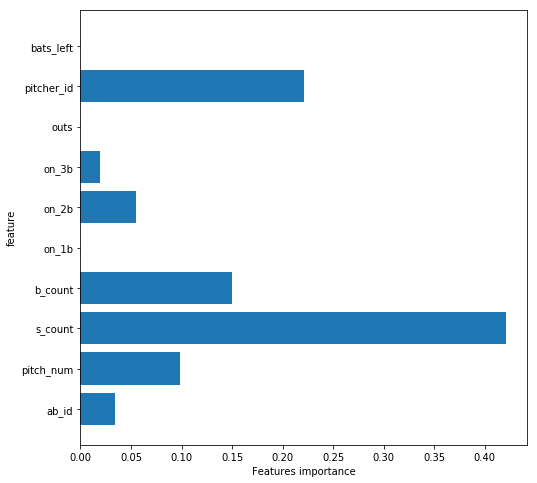

In [98]:
def plot_feature_importances(model):
    n_features = data_fb_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_fb_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

We can see from the graph above strike count has the biggest impact of a fastball being thrown, followed by pitcher and ball count. This can be used by batters when at the plate; depending on the strike counts they can be better prepared to hit a fastball.

In [342]:
pred = tree_clf.predict(data_fb_test)
print(confusion_matrix(target_fb_test, pred))
print(classification_report(target_fb_test, pred))

[[ 789  453]
 [1429  770]]
              precision    recall  f1-score   support

           0       0.36      0.64      0.46      1242
           1       0.63      0.35      0.45      2199

   micro avg       0.45      0.45      0.45      3441
   macro avg       0.49      0.49      0.45      3441
weighted avg       0.53      0.45      0.45      3441



In [343]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(data_fb_train, target_fb_train)
bagged_tree.score(data_fb_train, target_fb_train)


0.6699283084673513

From the results above, we can accurately predict if a fastball is going to be thrown about 67% of the time. This is better then predicting individual pitches. This shows batters can be better prepared at the plate when expecting a certain category of pitch. 

# Predicting four seam, two seam, & sinker

Here we are going to compare predicting different types of fastballs against eachother. We will only look at the three fastball pitches and remove the rest form our data.

#### Four Seam Fastball

In [102]:
four_seam = pd.read_csv('pitchers_astros.csv')

In [103]:
four_seam.head()

,Unnamed: 0,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
0,1664,2015000429,1,0,0,False,False,False,0,FF,L,572971
1,1665,2015000429,2,1,0,False,False,False,0,FF,L,572971
2,1666,2015000430,1,0,0,False,False,False,1,FF,L,572971
3,1668,2015000430,3,1,1,False,False,False,1,FT,L,572971
4,1669,2015000430,4,1,2,False,False,False,1,SL,L,572971


In [104]:
dif_pitches = four_seam.pitch_type.unique()
print(dif_pitches)

['FF' 'FT' 'SL' 'CH' 'SI' 'KC' 'CU']


In [105]:
four_seam = four_seam[four_seam.pitch_type != 'SL']
four_seam = four_seam[four_seam.pitch_type != 'CH']
four_seam = four_seam[four_seam.pitch_type != 'KC']
four_seam = four_seam[four_seam.pitch_type != 'CU']

In [106]:
pitch_type_4 = {"FF":1, "FT": 0, "SI":0}
print(pitch_type_4)

{'FF': 1, 'FT': 0, 'SI': 0}


In [107]:
four_seam['pitch_type'] = four_seam.pitch_type.map(pitch_type_4)

In [108]:
four_seam.head()

,Unnamed: 0,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
0,1664,2015000429,1,0,0,False,False,False,0,1,L,572971
1,1665,2015000429,2,1,0,False,False,False,0,1,L,572971
2,1666,2015000430,1,0,0,False,False,False,1,1,L,572971
3,1668,2015000430,3,1,1,False,False,False,1,0,L,572971
5,1670,2015000431,1,0,0,False,False,False,2,1,L,572971


In [109]:
target_4 = four_seam['pitch_type']
four_seam.drop('pitch_type', axis=1, inplace=True)
four_seam.drop('Unnamed: 0', axis=1, inplace=True)

In [117]:
four_seam.stand[four_seam.stand == 'L'] = 0
four_seam.stand[four_seam.stand == 'R'] = 1

In [118]:
four_seam.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,stand,pitcher_id
0,2015000429,1,0,0,False,False,False,0,0,572971
1,2015000429,2,1,0,False,False,False,0,0,572971
2,2015000430,1,0,0,False,False,False,1,0,572971
3,2015000430,3,1,1,False,False,False,1,0,572971
5,2015000431,1,0,0,False,False,False,2,0,572971


In [119]:
data_4 = pd.get_dummies(four_seam)
data_4.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,stand_0,stand_1
0,2015000429,1,0,0,False,False,False,0,572971,1,0
1,2015000429,2,1,0,False,False,False,0,572971,1,0
2,2015000430,1,0,0,False,False,False,1,572971,1,0
3,2015000430,3,1,1,False,False,False,1,572971,1,0
5,2015000431,1,0,0,False,False,False,2,572971,1,0


In [120]:
data_4 = data_4.drop(['stand_1'], axis=1)

In [121]:
data_4 = data_4.rename(index=str, columns={"stand_0": "bats_left"})

In [122]:
data_4.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,bats_left
0,2015000429,1,0,0,False,False,False,0,572971,1
1,2015000429,2,1,0,False,False,False,0,572971,1
2,2015000430,1,0,0,False,False,False,1,572971,1
3,2015000430,3,1,1,False,False,False,1,572971,1
5,2015000431,1,0,0,False,False,False,2,572971,1


In [123]:
data_4_train, data_4_test, target_4_train, target_4_test = train_test_split(
    data_4, target_4, test_size =.25, random_state=123)

In [124]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(data_4_train, target_4_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [125]:
#check importances of the features
tree_clf.feature_importances_

array([0.04219373, 0.00145922, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.94720689, 0.00914015])

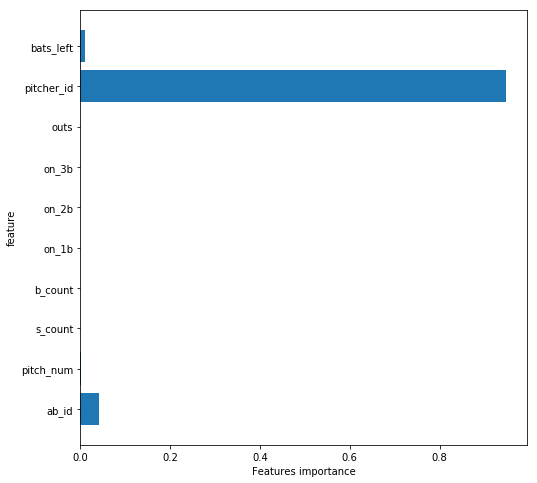

In [126]:
def plot_feature_importances(model):
    n_features = data_4_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_4_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

In [127]:
pred = tree_clf.predict(data_4_test)
print(confusion_matrix(target_4_test, pred))
print(classification_report(target_4_test, pred))

[[ 829  145]
 [ 153 1070]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       974
           1       0.88      0.87      0.88      1223

   micro avg       0.86      0.86      0.86      2197
   macro avg       0.86      0.86      0.86      2197
weighted avg       0.86      0.86      0.86      2197



In [289]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(data_4_train, target_4_train)
bagged_tree.score(data_4_train, target_4_train)

0.8646228562756109

#### Two Seam Fastball

In [129]:
two_seam = pd.read_csv('pitchers_astros.csv')

In [130]:
two_seam.head()

,Unnamed: 0,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
0,1664,2015000429,1,0,0,False,False,False,0,FF,L,572971
1,1665,2015000429,2,1,0,False,False,False,0,FF,L,572971
2,1666,2015000430,1,0,0,False,False,False,1,FF,L,572971
3,1668,2015000430,3,1,1,False,False,False,1,FT,L,572971
4,1669,2015000430,4,1,2,False,False,False,1,SL,L,572971


In [131]:
dif_pitches = two_seam.pitch_type.unique()
print(dif_pitches)

['FF' 'FT' 'SL' 'CH' 'SI' 'KC' 'CU']


In [132]:
two_seam = two_seam[two_seam.pitch_type != 'SL']
two_seam = two_seam[two_seam.pitch_type != 'CH']
two_seam = two_seam[two_seam.pitch_type != 'KC']
two_seam = two_seam[two_seam.pitch_type != 'CU']

In [133]:
pitch_type_2 = {"FF":0, "FT":1, "SI":0}
print(pitch_type_2)

{'FF': 0, 'FT': 1, 'SI': 0}


In [134]:
two_seam['pitch_type'] = two_seam.pitch_type.map(pitch_type_2)

In [135]:
two_seam.head()

,Unnamed: 0,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
0,1664,2015000429,1,0,0,False,False,False,0,0,L,572971
1,1665,2015000429,2,1,0,False,False,False,0,0,L,572971
2,1666,2015000430,1,0,0,False,False,False,1,0,L,572971
3,1668,2015000430,3,1,1,False,False,False,1,1,L,572971
5,1670,2015000431,1,0,0,False,False,False,2,0,L,572971


In [139]:
target_2 = two_seam['pitch_type']
two_seam.drop('pitch_type', axis=1, inplace=True)
two_seam.drop('Unnamed: 0', axis=1, inplace=True)

In [141]:
two_seam.stand[two_seam.stand == 'L'] = 0
two_seam.stand[two_seam.stand == 'R'] = 1

In [142]:
data_2 = pd.get_dummies(two_seam)
data_2.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,stand_0,stand_1
0,2015000429,1,0,0,False,False,False,0,572971,1,0
1,2015000429,2,1,0,False,False,False,0,572971,1,0
2,2015000430,1,0,0,False,False,False,1,572971,1,0
3,2015000430,3,1,1,False,False,False,1,572971,1,0
5,2015000431,1,0,0,False,False,False,2,572971,1,0


In [143]:
data_2 = data_2.drop(['stand_1'], axis=1)

In [144]:
data_2 = data_2.rename(index=str, columns={"stand_0": "bats_left"})

In [145]:
data_2.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,bats_left
0,2015000429,1,0,0,False,False,False,0,572971,1
1,2015000429,2,1,0,False,False,False,0,572971,1
2,2015000430,1,0,0,False,False,False,1,572971,1
3,2015000430,3,1,1,False,False,False,1,572971,1
5,2015000431,1,0,0,False,False,False,2,572971,1


In [146]:
data_2_train, data_2_test, target_2_train, target_2_test = train_test_split(
    data_2, target_2, test_size =.25, random_state=123)

In [147]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(data_2_train, target_2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [148]:
#check importances of the features
tree_clf.feature_importances_

array([4.31415771e-03, 0.00000000e+00, 0.00000000e+00, 1.32714329e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.18279476e-04,
       9.86506741e-01, 7.53367901e-03])

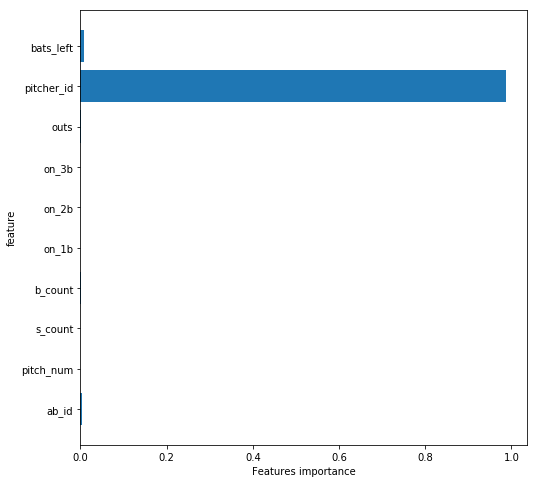

In [149]:
def plot_feature_importances(model):
    n_features = data_2_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_2_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

In [150]:
pred = tree_clf.predict(data_2_test)
print(confusion_matrix(target_2_test, pred))
print(classification_report(target_2_test, pred))

[[1205  150]
 [  13  829]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1355
           1       0.85      0.98      0.91       842

   micro avg       0.93      0.93      0.93      2197
   macro avg       0.92      0.94      0.92      2197
weighted avg       0.93      0.93      0.93      2197



In [290]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(data_2_train, target_2_train)
bagged_tree.score(data_2_train, target_2_train)

0.9271513127940507

#### Sinker

In [151]:
sinker = pd.read_csv('pitchers_astros.csv')

In [152]:
dif_pitches = sinker.pitch_type.unique()
print(dif_pitches)

['FF' 'FT' 'SL' 'CH' 'SI' 'KC' 'CU']


In [153]:
sinker = sinker[sinker.pitch_type != 'SL']
sinker = sinker[sinker.pitch_type != 'CH']
sinker = sinker[sinker.pitch_type != 'KC']
sinker = sinker[sinker.pitch_type != 'CU']

In [154]:
pitch_type_si = {"FF":0, "FT":0, "SI":1}

In [155]:
sinker['pitch_type'] = sinker.pitch_type.map(pitch_type_si)

In [156]:
sinker.head()

,Unnamed: 0,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
0,1664,2015000429,1,0,0,False,False,False,0,0,L,572971
1,1665,2015000429,2,1,0,False,False,False,0,0,L,572971
2,1666,2015000430,1,0,0,False,False,False,1,0,L,572971
3,1668,2015000430,3,1,1,False,False,False,1,0,L,572971
5,1670,2015000431,1,0,0,False,False,False,2,0,L,572971


In [157]:
target_si = sinker['pitch_type']
sinker.drop('pitch_type', axis=1, inplace=True)
sinker.drop('Unnamed: 0', axis=1, inplace=True)

In [158]:
sinker.stand[sinker.stand == 'L'] = 0
sinker.stand[sinker.stand == 'R'] = 1

In [159]:
sinker.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,stand,pitcher_id
0,2015000429,1,0,0,False,False,False,0,0,572971
1,2015000429,2,1,0,False,False,False,0,0,572971
2,2015000430,1,0,0,False,False,False,1,0,572971
3,2015000430,3,1,1,False,False,False,1,0,572971
5,2015000431,1,0,0,False,False,False,2,0,572971


In [160]:
data_si = pd.get_dummies(sinker)
data_si.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,stand_0,stand_1
0,2015000429,1,0,0,False,False,False,0,572971,1,0
1,2015000429,2,1,0,False,False,False,0,572971,1,0
2,2015000430,1,0,0,False,False,False,1,572971,1,0
3,2015000430,3,1,1,False,False,False,1,572971,1,0
5,2015000431,1,0,0,False,False,False,2,572971,1,0


In [161]:
data_si = data_si.drop(['stand_1'], axis=1)

In [162]:
data_si = data_si.rename(index=str, columns={"stand_0":"bats_left"})

In [163]:
data_si.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,bats_left
0,2015000429,1,0,0,False,False,False,0,572971,1
1,2015000429,2,1,0,False,False,False,0,572971,1
2,2015000430,1,0,0,False,False,False,1,572971,1
3,2015000430,3,1,1,False,False,False,1,572971,1
5,2015000431,1,0,0,False,False,False,2,572971,1


In [164]:
data_si_train, data_si_test, target_si_train, target_si_test = train_test_split(
    data_si, target_si, test_size =.25, random_state=123)

In [165]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(data_si_train, target_si_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [166]:
#check importances of the features
tree_clf.feature_importances_

array([0.40949688, 0.0093303 , 0.00901527, 0.        , 0.00194991,
       0.        , 0.        , 0.        , 0.57020764, 0.        ])

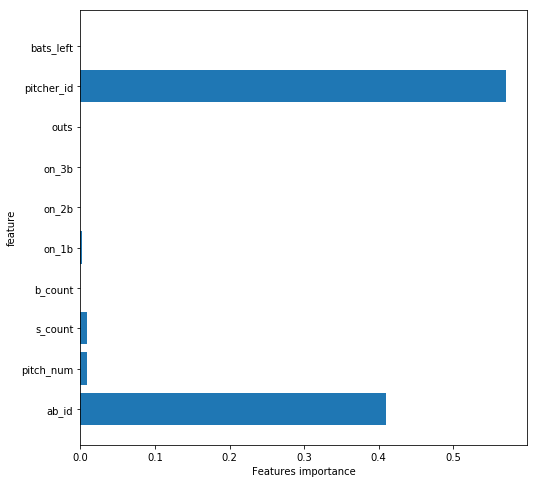

In [167]:
def plot_feature_importances(model):
    n_features = data_si_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_si_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

In [293]:
pred = tree_clf.predict(data_si_test)
print(confusion_matrix(target_si_test, pred))
print(classification_report(target_si_test, pred))

[[991 927  52  95]
 [132   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
              precision    recall  f1-score   support

           0       0.88      0.48      0.62      2065
           1       0.00      0.00      0.00       132
           2       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

   micro avg       0.45      0.45      0.45      2197
   macro avg       0.22      0.12      0.16      2197
weighted avg       0.83      0.45      0.58      2197



In [294]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(data_si_train, target_si_train)
bagged_tree.score(data_si_train, target_si_train)

0.9391409925633631

## Results

From the information above we can see that when it comes to predicting a certain type of fastball: four seam, two seam, or sinker it is most related to who the pitcher is. This further shows that certain pitchers have certain preferences so when up at the plate and expecting a fastball you can better predict which style it will be given who is at the mound.

# Breaking Balls: slider, curve ball, knuckle ball

Here we will be running our test to see if we can predict whether or not a breaking ball will be thrown. We are categorizing breaking balls as slider, curve ball, and knuckle ball.

In [171]:
breaking_ball = pd.read_csv('pitchers_astros.csv')

In [172]:
breaking_ball.head()

,Unnamed: 0,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
0,1664,2015000429,1,0,0,False,False,False,0,FF,L,572971
1,1665,2015000429,2,1,0,False,False,False,0,FF,L,572971
2,1666,2015000430,1,0,0,False,False,False,1,FF,L,572971
3,1668,2015000430,3,1,1,False,False,False,1,FT,L,572971
4,1669,2015000430,4,1,2,False,False,False,1,SL,L,572971


In the dictionary here we will classify sliders, curve balls, and knuckle balls as breaking balls (1) and everything else as not a breaking ball (0).

In [173]:
dif_pitches = breaking_ball.pitch_type.unique()
print(dif_pitches)

['FF' 'FT' 'SL' 'CH' 'SI' 'KC' 'CU']


In [174]:
pitch_type_bb = {"FF":0, "FT": 0, "SL": 1, "CH": 0, "SI":0, "KC": 1, "CU": 1}
print(pitch_type_bb)

{'FF': 0, 'FT': 0, 'SL': 1, 'CH': 0, 'SI': 0, 'KC': 1, 'CU': 1}


In [175]:
breaking_ball['pitch_type'] = breaking_ball.pitch_type.map(pitch_type_bb)

In [176]:
breaking_ball.head()

,Unnamed: 0,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
0,1664,2015000429,1,0,0,False,False,False,0,0,L,572971
1,1665,2015000429,2,1,0,False,False,False,0,0,L,572971
2,1666,2015000430,1,0,0,False,False,False,1,0,L,572971
3,1668,2015000430,3,1,1,False,False,False,1,0,L,572971
4,1669,2015000430,4,1,2,False,False,False,1,1,L,572971


In [177]:
target_bb = breaking_ball['pitch_type']
breaking_ball.drop('pitch_type', axis=1, inplace=True)
breaking_ball.drop('Unnamed: 0', axis=1, inplace=True)

In [178]:
breaking_ball.stand[breaking_ball.stand == 'L'] = 0
breaking_ball.stand[breaking_ball.stand == 'R'] = 1

In [179]:
breaking_ball.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,stand,pitcher_id
0,2015000429,1,0,0,False,False,False,0,0,572971
1,2015000429,2,1,0,False,False,False,0,0,572971
2,2015000430,1,0,0,False,False,False,1,0,572971
3,2015000430,3,1,1,False,False,False,1,0,572971
4,2015000430,4,1,2,False,False,False,1,0,572971


In [180]:
data_bb = pd.get_dummies(breaking_ball)
data.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,bats_left
1664,2015000429,1,0,0,False,False,False,0,572971,1
1665,2015000429,2,1,0,False,False,False,0,572971,1
1666,2015000430,1,0,0,False,False,False,1,572971,1
1668,2015000430,3,1,1,False,False,False,1,572971,1
1669,2015000430,4,1,2,False,False,False,1,572971,1


In [181]:
data_bb = data_bb.drop(['stand_1'], axis=1)

In [182]:
data_bb = data_bb.rename(index=str, columns={"stand_0": "bats_left"})

In [183]:
data_bb.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,bats_left
0,2015000429,1,0,0,False,False,False,0,572971,1
1,2015000429,2,1,0,False,False,False,0,572971,1
2,2015000430,1,0,0,False,False,False,1,572971,1
3,2015000430,3,1,1,False,False,False,1,572971,1
4,2015000430,4,1,2,False,False,False,1,572971,1


In [184]:
data_bb_train, data_bb_test, target_bb_train, target_bb_test = train_test_split(
    data_bb, target_bb, test_size =.25, random_state=123)

In [185]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(data_bb_train, target_bb_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [186]:
#check importances of the features
tree_clf.feature_importances_

array([0.02985997, 0.00932719, 0.44472946, 0.22574771, 0.        ,
       0.03825253, 0.03591932, 0.00483721, 0.20189957, 0.00942705])

## Results

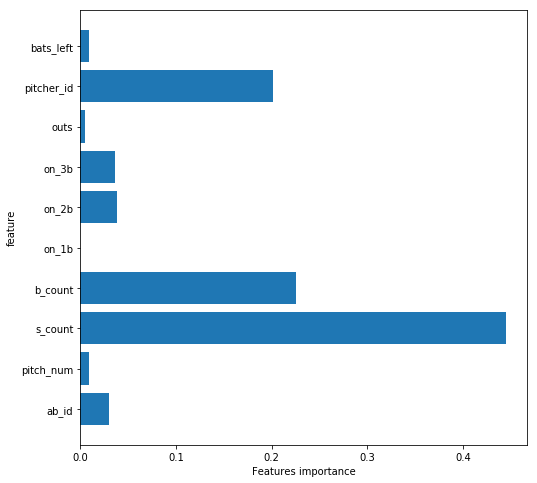

In [187]:
def plot_feature_importances(model):
    n_features = data_bb_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_bb_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

From the graph above we see that ball/strike count, specifically strike count, has the biggest impact on whether or not a breaking ball is going to be thrown.

In [188]:
pred = tree_clf.predict(data_bb_test)
print(confusion_matrix(target_bb_test, pred))
print(classification_report(target_bb_test, pred))

[[2388   83]
 [ 884   86]]
              precision    recall  f1-score   support

           0       0.73      0.97      0.83      2471
           1       0.51      0.09      0.15       970

   micro avg       0.72      0.72      0.72      3441
   macro avg       0.62      0.53      0.49      3441
weighted avg       0.67      0.72      0.64      3441



In [318]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(data_bb_train, target_bb_train)
bagged_tree.score(data_bb_train, target_bb_train)

0.7277659368339469

The prediction above shows that when expecting a breaking ball versus another type of pitch we are accurate about 73% of the time. The batter can use this information to know what better to expect at the plate given the ball/strike count.

# Predicting slider, curve ball, knuckle curve

Here we are going to compare predicting different types of breaking balls against eachother. We will only look at the three breaking ball pitches and remove the rest form our data.

### Slider

In [189]:
slider = pd.read_csv('pitchers_astros.csv')

In [190]:
dif_pitches = slider.pitch_type.unique()
print(dif_pitches)

['FF' 'FT' 'SL' 'CH' 'SI' 'KC' 'CU']


In [191]:
slider = slider[slider.pitch_type != 'FF']
slider = slider[slider.pitch_type != 'FT']
slider = slider[slider.pitch_type != 'CH']
slider = slider[slider.pitch_type != 'SI']

In [192]:
pitch_type_sl = {"SL":1, "CU": 0, "KC":0}
print(pitch_type_4)

{'FF': 1, 'FT': 0, 'SI': 0}


In [193]:
slider['pitch_type'] = slider.pitch_type.map(pitch_type_sl)

In [194]:
slider.head()

,Unnamed: 0,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
4,1669,2015000430,4,1,2,False,False,False,1,1,L,572971
6,1671,2015000431,2,1,0,False,False,False,2,1,L,572971
7,1672,2015000431,3,1,1,False,False,False,2,1,L,572971
9,1683,2015000435,2,1,0,False,False,False,0,1,R,572971
10,1684,2015000435,3,2,0,False,False,False,0,1,R,572971


In [195]:
target_sl = slider['pitch_type']
slider.drop('pitch_type', axis=1, inplace=True)
slider.drop('Unnamed: 0', axis=1, inplace=True)

In [196]:
slider.stand[slider.stand == 'L'] = 0
slider.stand[slider.stand == 'R'] = 1

In [197]:
slider.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,stand,pitcher_id
4,2015000430,4,1,2,False,False,False,1,0,572971
6,2015000431,2,1,0,False,False,False,2,0,572971
7,2015000431,3,1,1,False,False,False,2,0,572971
9,2015000435,2,1,0,False,False,False,0,1,572971
10,2015000435,3,2,0,False,False,False,0,1,572971


In [198]:
data_sl = pd.get_dummies(slider)
data_sl.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,stand_0,stand_1
4,2015000430,4,1,2,False,False,False,1,572971,1,0
6,2015000431,2,1,0,False,False,False,2,572971,1,0
7,2015000431,3,1,1,False,False,False,2,572971,1,0
9,2015000435,2,1,0,False,False,False,0,572971,0,1
10,2015000435,3,2,0,False,False,False,0,572971,0,1


In [199]:
data_sl = data_sl.drop(['stand_1'], axis=1)

In [200]:
data_sl = data_sl.rename(index=str, columns={"stand_0": "bats_left"})

In [201]:
data_sl.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,bats_left
4,2015000430,4,1,2,False,False,False,1,572971,1
6,2015000431,2,1,0,False,False,False,2,572971,1
7,2015000431,3,1,1,False,False,False,2,572971,1
9,2015000435,2,1,0,False,False,False,0,572971,0
10,2015000435,3,2,0,False,False,False,0,572971,0


In [202]:
data_sl_train, data_sl_test, target_sl_train, target_sl_test = train_test_split(
    data_sl, target_sl, test_size =.25, random_state=123)

In [203]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(data_sl_train, target_sl_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [204]:
#check importances of the features
tree_clf.feature_importances_

array([0.01488264, 0.01573602, 0.00701538, 0.00427286, 0.        ,
       0.00146424, 0.        , 0.        , 0.95662886, 0.        ])

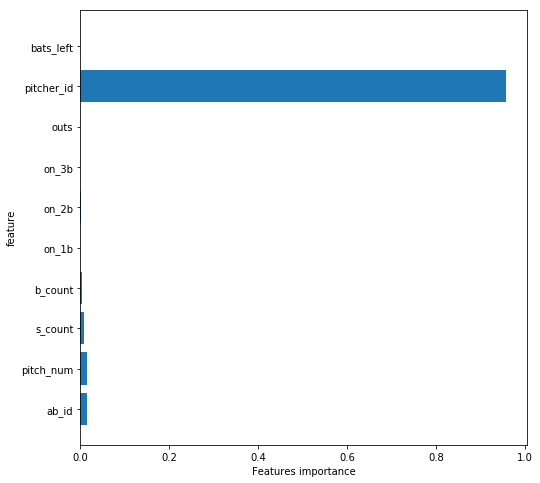

In [205]:
def plot_feature_importances(model):
    n_features = data_4_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_4_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

In [206]:
pred = tree_clf.predict(data_sl_test)
print(confusion_matrix(target_sl_test, pred))
print(classification_report(target_sl_test, pred))

[[392 106]
 [ 57 418]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       498
           1       0.80      0.88      0.84       475

   micro avg       0.83      0.83      0.83       973
   macro avg       0.84      0.83      0.83       973
weighted avg       0.84      0.83      0.83       973



In [319]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(data_sl_train, target_sl_train)
bagged_tree.score(data_sl_train, target_sl_train)

0.8525882756256428

#### Curve Ball

In [207]:
curve_ball = pd.read_csv('pitchers_astros.csv')

In [208]:
dif_pitches = curve_ball.pitch_type.unique()
print(dif_pitches)

['FF' 'FT' 'SL' 'CH' 'SI' 'KC' 'CU']


In [209]:
curve_ball = curve_ball[curve_ball.pitch_type != 'FF']
curve_ball = curve_ball[curve_ball.pitch_type != 'FT']
curve_ball = curve_ball[curve_ball.pitch_type != 'CH']
curve_ball = curve_ball[curve_ball.pitch_type != 'SI']

In [210]:
pitch_type_cu = {"SL":0, "CU": 1, "KC":0}
print(pitch_type_cu)

{'SL': 0, 'CU': 1, 'KC': 0}


In [211]:
curve_ball['pitch_type'] = curve_ball.pitch_type.map(pitch_type_cu)

In [212]:
curve_ball.head()

,Unnamed: 0,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
4,1669,2015000430,4,1,2,False,False,False,1,0,L,572971
6,1671,2015000431,2,1,0,False,False,False,2,0,L,572971
7,1672,2015000431,3,1,1,False,False,False,2,0,L,572971
9,1683,2015000435,2,1,0,False,False,False,0,0,R,572971
10,1684,2015000435,3,2,0,False,False,False,0,0,R,572971


In [213]:
target_cu = curve_ball['pitch_type']
curve_ball.drop('pitch_type', axis=1, inplace=True)
curve_ball.drop('Unnamed: 0', axis=1, inplace=True)

In [214]:
curve_ball.stand[curve_ball.stand == 'L'] = 0
curve_ball.stand[curve_ball.stand == 'R'] = 1

In [215]:
curve_ball.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,stand,pitcher_id
4,2015000430,4,1,2,False,False,False,1,0,572971
6,2015000431,2,1,0,False,False,False,2,0,572971
7,2015000431,3,1,1,False,False,False,2,0,572971
9,2015000435,2,1,0,False,False,False,0,1,572971
10,2015000435,3,2,0,False,False,False,0,1,572971


In [216]:
data_cu = pd.get_dummies(curve_ball)
data_cu.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,stand_0,stand_1
4,2015000430,4,1,2,False,False,False,1,572971,1,0
6,2015000431,2,1,0,False,False,False,2,572971,1,0
7,2015000431,3,1,1,False,False,False,2,572971,1,0
9,2015000435,2,1,0,False,False,False,0,572971,0,1
10,2015000435,3,2,0,False,False,False,0,572971,0,1


In [217]:
data_cu = data_cu.drop(['stand_1'], axis=1)

In [218]:
data_cu = data_cu.rename(index=str, columns={"stand_0": "bats_left"})

In [219]:
data_cu.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,bats_left
4,2015000430,4,1,2,False,False,False,1,572971,1
6,2015000431,2,1,0,False,False,False,2,572971,1
7,2015000431,3,1,1,False,False,False,2,572971,1
9,2015000435,2,1,0,False,False,False,0,572971,0
10,2015000435,3,2,0,False,False,False,0,572971,0


In [220]:
data_cu_train, data_cu_test, target_cu_train, target_cu_test = train_test_split(
    data_cu, target_cu, test_size =.25, random_state=123)

In [221]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(data_cu_train, target_cu_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [222]:
#check importances of the features
tree_clf.feature_importances_

array([5.22095568e-03, 2.59639969e-04, 8.34753240e-03, 8.60115549e-03,
       4.83908882e-03, 1.74228173e-03, 0.00000000e+00, 0.00000000e+00,
       9.67599492e-01, 3.38985400e-03])

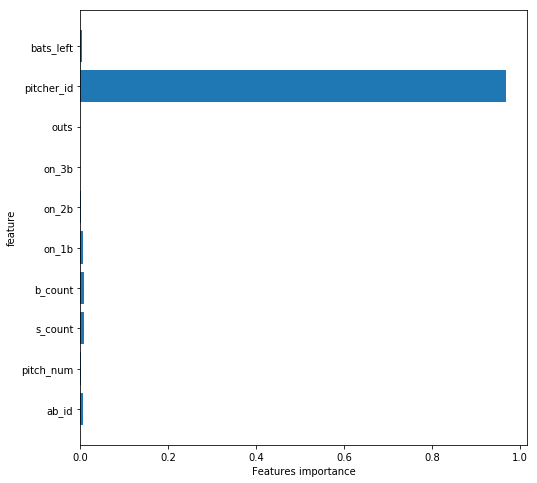

In [223]:
def plot_feature_importances(model):
    n_features = data_cu_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_cu_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

In [224]:
pred = tree_clf.predict(data_cu_test)
print(confusion_matrix(target_cu_test, pred))
print(classification_report(target_cu_test, pred))

[[707  37]
 [ 64 165]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       744
           1       0.82      0.72      0.77       229

   micro avg       0.90      0.90      0.90       973
   macro avg       0.87      0.84      0.85       973
weighted avg       0.89      0.90      0.89       973



In [320]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(data_cu_train, target_cu_train)
bagged_tree.score(data_cu_train, target_cu_train)

0.9218375042852246

#### Knuckle Ball

In [226]:
knuckle = pd.read_csv('pitchers_astros.csv')

In [228]:
dif_pitches = knuckle.pitch_type.unique()
print(dif_pitches)

['FF' 'FT' 'SL' 'CH' 'SI' 'KC' 'CU']


In [229]:
knuckle = knuckle[knuckle.pitch_type != 'FF']
knuckle = knuckle[knuckle.pitch_type != 'FT']
knuckle = knuckle[knuckle.pitch_type != 'CH']
knuckle = knuckle[knuckle.pitch_type != 'SI']

In [230]:
pitch_type_kc = {"SL":0, "CU": 0, "KC":1}
print(pitch_type_4)

{'FF': 1, 'FT': 0, 'SI': 0}


In [231]:
knuckle['pitch_type'] = knuckle.pitch_type.map(pitch_type_kc)

In [232]:
knuckle.head()

,Unnamed: 0,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitch_type,stand,pitcher_id
4,1669,2015000430,4,1,2,False,False,False,1,0,L,572971
6,1671,2015000431,2,1,0,False,False,False,2,0,L,572971
7,1672,2015000431,3,1,1,False,False,False,2,0,L,572971
9,1683,2015000435,2,1,0,False,False,False,0,0,R,572971
10,1684,2015000435,3,2,0,False,False,False,0,0,R,572971


In [233]:
target_kc = knuckle['pitch_type']
knuckle.drop('pitch_type', axis=1, inplace=True)
knuckle.drop('Unnamed: 0', axis=1, inplace=True)

In [234]:
knuckle.stand[knuckle.stand == 'L'] = 0
knuckle.stand[knuckle.stand == 'R'] = 1

In [235]:
knuckle.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,stand,pitcher_id
4,2015000430,4,1,2,False,False,False,1,0,572971
6,2015000431,2,1,0,False,False,False,2,0,572971
7,2015000431,3,1,1,False,False,False,2,0,572971
9,2015000435,2,1,0,False,False,False,0,1,572971
10,2015000435,3,2,0,False,False,False,0,1,572971


In [236]:
data_kc = pd.get_dummies(knuckle)
data_kc.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,stand_0,stand_1
4,2015000430,4,1,2,False,False,False,1,572971,1,0
6,2015000431,2,1,0,False,False,False,2,572971,1,0
7,2015000431,3,1,1,False,False,False,2,572971,1,0
9,2015000435,2,1,0,False,False,False,0,572971,0,1
10,2015000435,3,2,0,False,False,False,0,572971,0,1


In [237]:
data_kc = data_kc.drop(['stand_1'], axis=1)

In [238]:
data_kc = data_kc.rename(index=str, columns={"stand_0": "bats_left"})

In [239]:
data_kc.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,bats_left
4,2015000430,4,1,2,False,False,False,1,572971,1
6,2015000431,2,1,0,False,False,False,2,572971,1
7,2015000431,3,1,1,False,False,False,2,572971,1
9,2015000435,2,1,0,False,False,False,0,572971,0
10,2015000435,3,2,0,False,False,False,0,572971,0


In [240]:
data_kc_train, data_kc_test, target_kc_train, target_kc_test = train_test_split(
    data_kc, target_kc, test_size =.25, random_state=123)

In [241]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(data_kc_train, target_kc_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [242]:
#check importances of the features
tree_clf.feature_importances_

array([0.02480165, 0.01513595, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.9600624 , 0.        ])

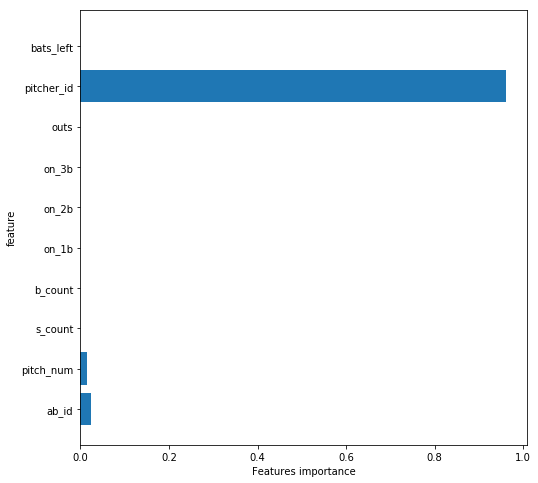

In [243]:
def plot_feature_importances(model):
    n_features = data_kc_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_kc_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

In [244]:
pred = tree_clf.predict(data_kc_test)
print(confusion_matrix(target_kc_test, pred))
print(classification_report(target_kc_test, pred))

[[694  10]
 [ 56 213]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.95       704
           1       0.96      0.79      0.87       269

   micro avg       0.93      0.93      0.93       973
   macro avg       0.94      0.89      0.91       973
weighted avg       0.93      0.93      0.93       973



In [321]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(data_kc_train, target_kc_train)
bagged_tree.score(data_kc_train, target_kc_train)

0.9389784024682893

As we saw with fastballs, the information above for breaking balls shows that when it comes to predicting a certain type of breaking ball: slider, curve ball, or knuckle ball it is most related to who the pitcher is. This further shows that certain pitchers have certain preferences so when up at the plate and expecting a breaking ball you can better predict which style it will be given who is at the mound.

# Change Up

Here we will be running our test to see if we can predict whether or not a change up will be thrown.

In [322]:
change_up = pd.read_csv('pitchers_astros.csv')

In [324]:
print(change_up.pitch_type.unique())

['FF' 'FT' 'SL' 'CH' 'SI' 'KC' 'CU']


In [325]:
change_up = change_up[change_up.pitch_type != 'FF']
change_up = change_up[change_up.pitch_type != 'FT']
change_up = change_up[change_up.pitch_type != 'SL']

In [327]:
pitch_type_ch = {"CH": 1, "SI":0, "KC": 0, "CU": 0}
print(pitch_type_ch)

{'CH': 1, 'SI': 0, 'KC': 0, 'CU': 0}


In [328]:
change_up['pitch_type'] = change_up.pitch_type.map(pitch_type_ch)

In [329]:
target_ch = change_up['pitch_type']
change_up.drop('pitch_type', axis=1, inplace=True)
change_up.drop('Unnamed: 0', axis=1, inplace=True)

In [330]:
change_up.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,stand,pitcher_id
14,2015000436,4,1,2,False,False,False,1,R,572971
31,2015000443,3,1,1,True,False,False,1,R,572971
32,2015000443,4,2,1,True,False,False,1,R,572971
52,2015000452,2,1,0,True,False,False,2,R,572971
70,2015000459,2,1,0,True,False,False,2,R,572971


In [331]:
change_up.stand[change_up.stand == 'L'] = 0
change_up.stand[change_up.stand == 'R'] = 1

In [332]:
data_ch = pd.get_dummies(change_up)
data_ch.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,stand_0,stand_1
14,2015000436,4,1,2,False,False,False,1,572971,0,1
31,2015000443,3,1,1,True,False,False,1,572971,0,1
32,2015000443,4,2,1,True,False,False,1,572971,0,1
52,2015000452,2,1,0,True,False,False,2,572971,0,1
70,2015000459,2,1,0,True,False,False,2,572971,0,1


In [333]:
data_ch = data_ch.drop(['stand_1'], axis=1)

In [334]:
data_ch = data_ch.rename(index=str, columns={"stand_0": "bats_left"})

In [335]:
data_ch.head()

,ab_id,pitch_num,s_count,b_count,on_1b,on_2b,on_3b,outs,pitcher_id,bats_left
14,2015000436,4,1,2,False,False,False,1,572971,0
31,2015000443,3,1,1,True,False,False,1,572971,0
32,2015000443,4,2,1,True,False,False,1,572971,0
52,2015000452,2,1,0,True,False,False,2,572971,0
70,2015000459,2,1,0,True,False,False,2,572971,0


In [336]:
data_ch_train, data_ch_test, target_ch_train, target_ch_test = train_test_split(
    data_ch, target_ch, test_size =.25, random_state=123)

In [337]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(data_ch_train, target_ch_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [338]:
#check importances of the features
tree_clf.feature_importances_

array([0.03821424, 0.02285098, 0.01924155, 0.01613538, 0.        ,
       0.        , 0.00190075, 0.        , 0.81828343, 0.08337365])

## Results

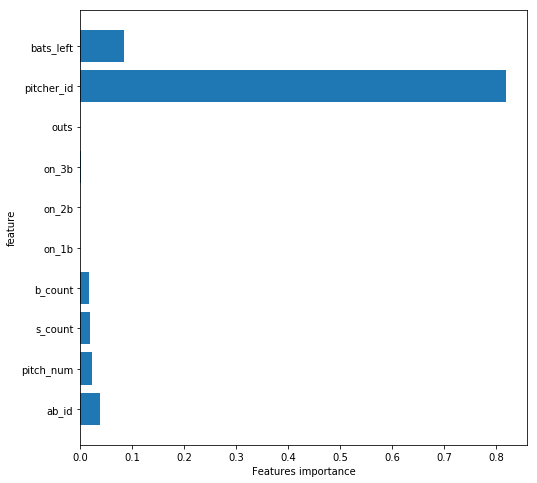

In [339]:
def plot_feature_importances(model):
    n_features = data_ch_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_ch_train.columns.values)
    plt.xlabel('Features importance')
    plt.ylabel('feature')
plot_feature_importances(tree_clf)    

As we saw with fastballs and breaking balls, the pitcher who is on the mound has the biggest impact on what type of pitch will be thrown. This is due to their personal strengths.

In [340]:
pred = tree_clf.predict(data_ch_test)
print(confusion_matrix(target_ch_test, pred))
print(classification_report(target_ch_test, pred))

[[591  34]
 [ 90 182]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       625
           1       0.84      0.67      0.75       272

   micro avg       0.86      0.86      0.86       897
   macro avg       0.86      0.81      0.83       897
weighted avg       0.86      0.86      0.86       897



In [341]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(data_ch_train, target_ch_train)
bagged_tree.score(data_ch_train, target_ch_train)

0.8705357142857143

Here we see that we can accurately predict whether or not a change up is going to be thrown 87% of the time. Unlike the other categories pitches that had a high relationship with the strike count, change ups rely mostly on the pitcher. This is due to the fact this a specific pitch versus a category of pitches. 